## Group Project Prososal (group 11) 

In [56]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

## 1. Title : Credit Card Fraud Data Analysis Report



## 2. Introduction:

**1) Background Information** 

As digital payments boomed in recent years with the rapid development of the Internet, people enjoy the fast and convenient transaction service but also face an increasing number of cyber criminals alongside. The Data Breach Index announced that over five million records are being stolen on a daily basis, which indicates that fraud is very common in our daily life. However, detection of fraud is challenging since trillions of card transactions happen per day. 


**2) Research Question**

Based on the analysis, can we predict fraudulent transaction using **<font color=red> distance from home, ratio to median purchase price and online order </font>**  variables to prevent future crime?

**3) Dataset description**

We will be using a dataset called Credit Card Fraud made by Dhanush Narayanan from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud. The dataset is in a “Comma Seperated Value” (csv) file format and contains eight columns, which are: 
distance_from_home : the distance from home where the transaction happened
distance_from_last_transaction : the distance from last transaction happened.
ratio_to_median_purchase_price  :  Ratio of purchased price transaction to median purchase price.
repeat_retailer : whether the transaction happened from same retailer or not
used_chip : whether the transaction is through chip (credit card) or not
used_pin_number : whether the transaction happened by using PIN number or not
online_order : whether the transaction is an online order or not
fraud : whether the transaction is fraudulent or not


In [68]:
#Find the correlation between fraud and other variables
cor(card_data)

ERROR: Error in cor(card_data): 'x' must be numeric


## 3. Preliminary exploratory data analysis:

Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [57]:
#upload 

In [58]:
#read the file

data <- read.csv("data/card_transdata.csv") %>%
                mutate(repeat_retailer = as.logical(repeat_retailer)) %>%
                mutate(used_chip = as.logical(used_chip)) %>%
                mutate(used_pin_number = as.logical(used_pin_number)) %>%
                mutate(online_order = as.logical(online_order)) %>%
                mutate(fraud = as.logical(fraud))%>% 
                mutate(repeat_retailer = as_factor(repeat_retailer)) %>%
                mutate(used_chip = as_factor(used_chip)) %>%
                mutate(used_pin_number = as_factor(used_pin_number)) %>%
                mutate(online_order = as_factor(online_order)) %>%
                mutate(fraud = as_factor(fraud)) 
head(data, 10)


# data <- read.csv("data/card_transdata.csv") %>%
#                 mutate(repeat_retailer = as_factor(repeat_retailer)) %>%
#                 mutate(used_chip = as_factor(used_chip)) %>%
#                 mutate(used_pin_number = as_factor(used_pin_number)) %>%
#                 mutate(online_order = as_factor(online_order)) %>%
#                 mutate(fraud = as_factor(fraud))
                

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,57.8778566,0.3111400,1.94593998,TRUE,TRUE,FALSE,FALSE,FALSE
2,10.8299427,0.1755915,1.29421881,TRUE,FALSE,FALSE,FALSE,FALSE
3,5.0910795,0.8051526,0.42771456,TRUE,FALSE,FALSE,TRUE,FALSE
4,2.2475643,5.6000435,0.36266258,TRUE,TRUE,FALSE,TRUE,FALSE
5,44.1909360,0.5664863,2.22276730,TRUE,TRUE,FALSE,TRUE,FALSE
6,5.5864077,13.2610733,0.06476847,TRUE,FALSE,FALSE,FALSE,FALSE
7,3.7240191,0.9568379,0.27846494,TRUE,FALSE,FALSE,TRUE,FALSE
8,4.8482466,0.3207354,1.27304952,TRUE,FALSE,TRUE,FALSE,FALSE
9,0.8766323,2.5036089,1.51699932,FALSE,FALSE,FALSE,FALSE,FALSE


In [59]:
card_data <- select(data, distance_from_home, ratio_to_median_purchase_price, online_order, fraud ) %>%
            filter(online_order == "TRUE")
head(card_data, 10)

,distance_from_home,ratio_to_median_purchase_price,online_order,fraud
,<dbl>,<dbl>,<fct>,<fct>
1,5.091079,0.4277146,TRUE,FALSE
2,2.247564,0.3626626,TRUE,FALSE
3,44.190936,2.2227673,TRUE,FALSE
4,3.724019,0.2784649,TRUE,FALSE
5,8.839047,2.3616825,TRUE,FALSE
6,14.263530,1.1361019,TRUE,FALSE
7,13.592368,1.3703299,TRUE,FALSE
8,2.131956,6.3586673,TRUE,TRUE
9,13.955972,2.7989011,TRUE,FALSE


In [67]:
set.seed(1)
## creat training data for card_data

card_split <- initial_split(card_data, prop = 0.75, strata = fraud)  
card_train <- training(card_split) 
card_test <- testing(card_split)

head(card_train, 10)

count(card_train)

,distance_from_home,ratio_to_median_purchase_price,online_order,fraud
,<dbl>,<dbl>,<fct>,<fct>
2,2.247564,0.3626626,TRUE,FALSE
3,44.190936,2.2227673,TRUE,FALSE
4,3.724019,0.2784649,TRUE,FALSE
5,8.839047,2.3616825,TRUE,FALSE
6,14.263530,1.1361019,TRUE,FALSE
7,13.592368,1.3703299,TRUE,FALSE
8,2.131956,6.3586673,TRUE,TRUE
9,13.955972,2.7989011,TRUE,FALSE
10,179.665148,0.5356405,TRUE,FALSE


n
<int>
487915


Warning message:
“Removed 89 rows containing missing values (geom_point).”
Warning message:
“Ignoring unknown parameters: aplha”
Warning message:
“Removed 261 rows containing missing values (geom_point).”


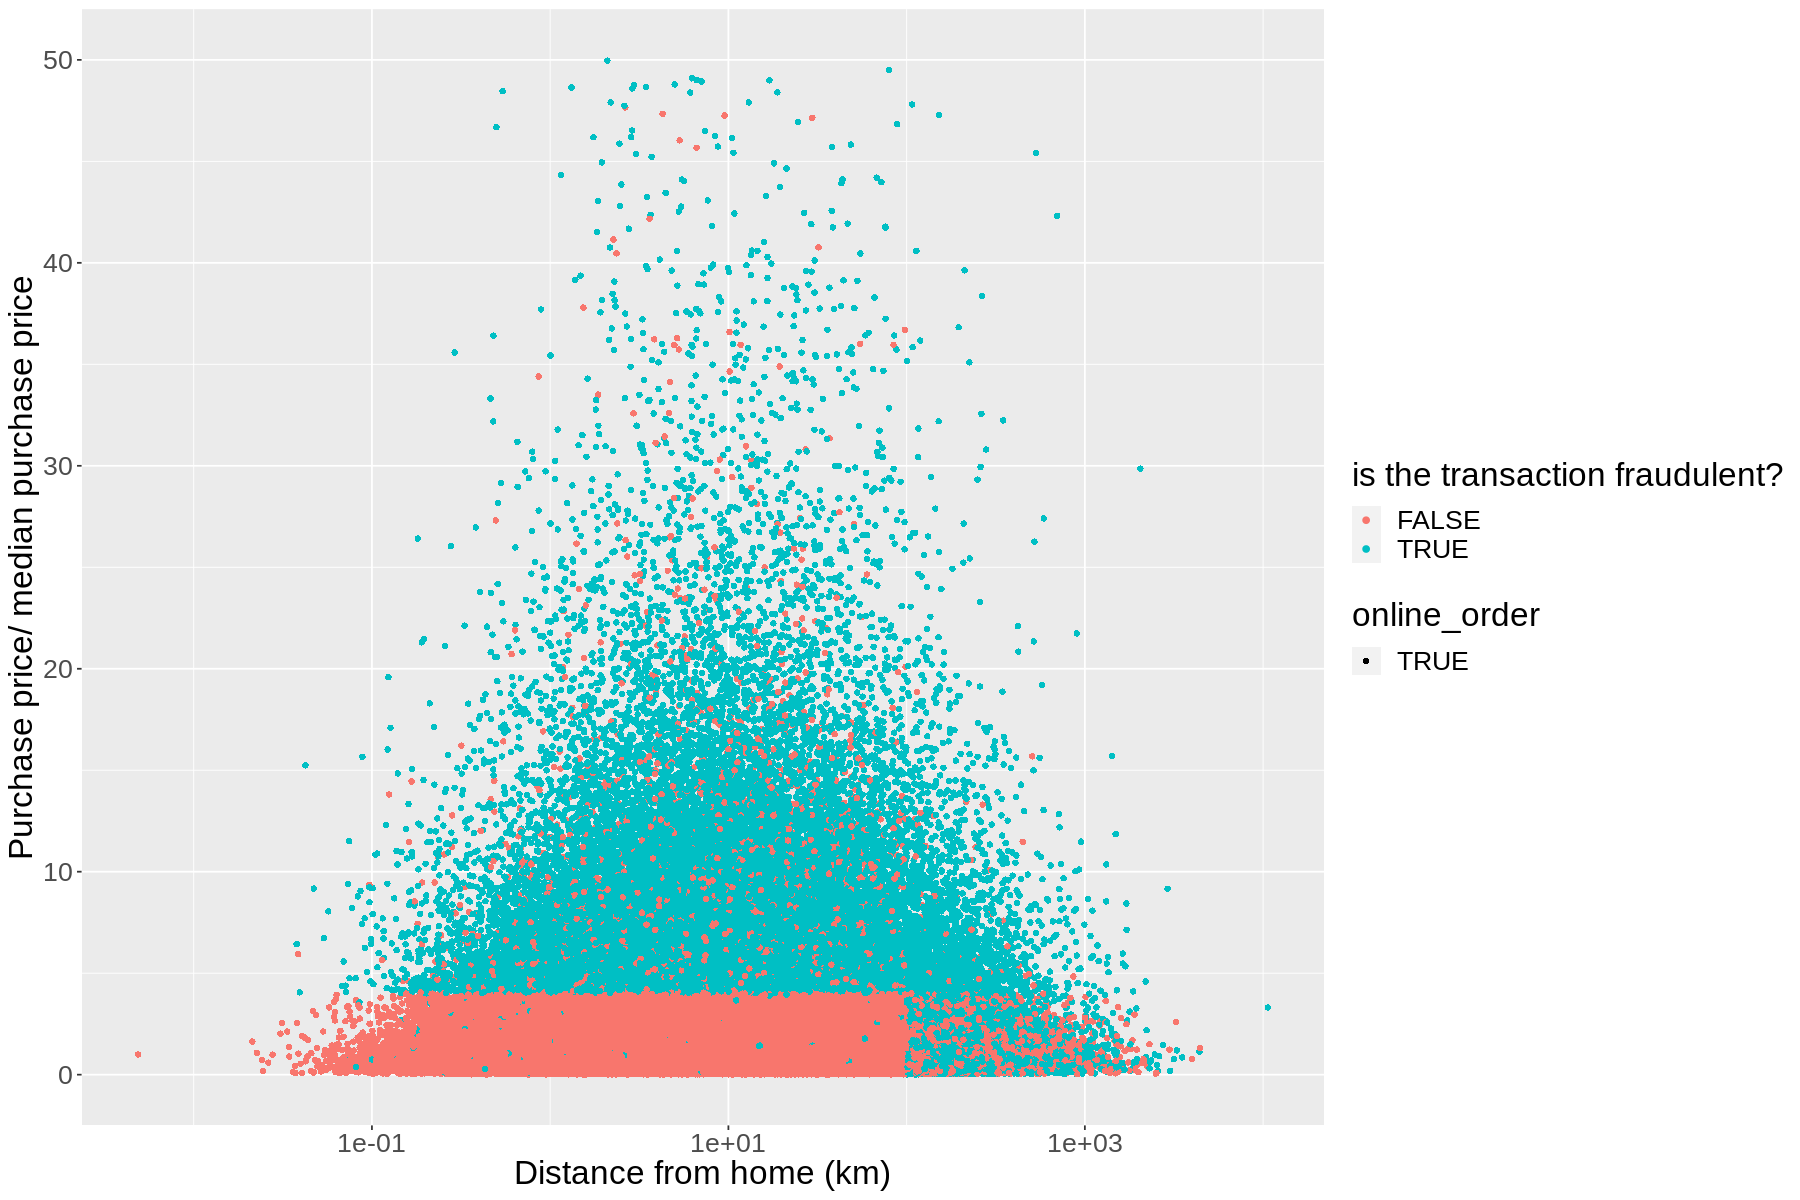

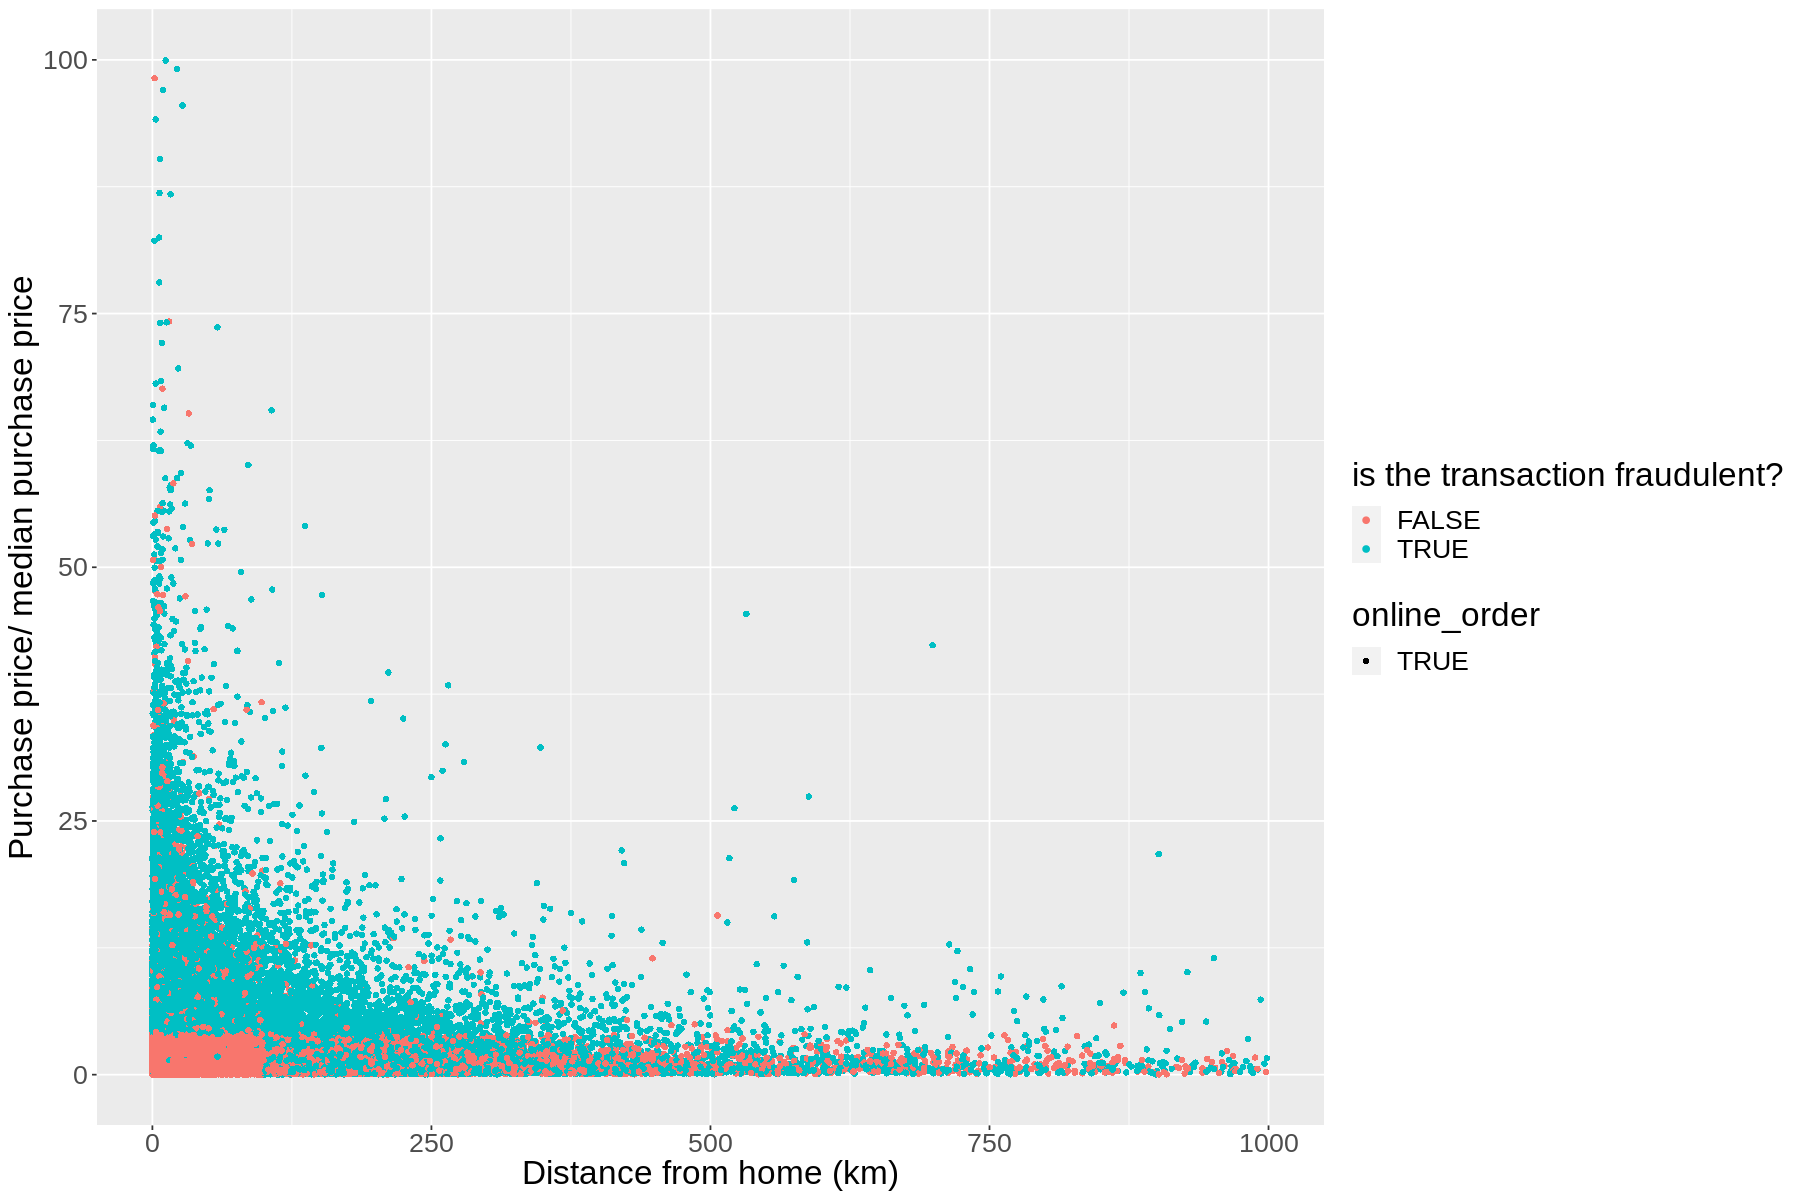

In [66]:
options(repr.plot.width = 15, repr.plot.height = 10) 

card_plot <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud ,shape = online_order)) +
            geom_point() +
            scale_y_continuous(limits = c(0, 50))+
            scale_x_continuous(trans = 'log10')+
            labs( x = "Distance from home (km)" , y = "Purchase price/ median purchase price" , color = "is the transaction fraudulent?" , shape = "online_order") +
            theme(text = element_text(size = 20))

card_plot


#            scale_y_continuous(trans = 'log10',limits = c(0, 150))+
#             scale_x_continuous(trans = 'log10',limits = c(0, 1000))+


card_plot2 <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud ,shape = online_order)) +
            geom_point(aplha = 0.3) +
           scale_y_continuous(limits = c(0, 100))+
             scale_x_continuous(limits = c(0, 1000))+
            labs( x = "Distance from home (km)" , y = "Purchase price/ median purchase price" , color = "is the transaction fraudulent?" , shape = "online_order") +
            theme(text = element_text(size = 20))

card_plot2





## 4. Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. 

Note - you do not need to use all variables/columns that exist in the raw data set.

In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results

## 5. Expected outcomes and significance:
What do you expect to find?

What impact could such findings have?

What future questions could this lead to?